## Data Analysis using the Data File in 'Program_files' folder

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress


In [2]:
pd.options.display.max_columns = None

pop_ev_msrp = pd.read_csv('../Output_data/pop_ev_msrp.csv')

pop_ev_msrp.info()
pop_ev_msrp.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163135 entries, 0 to 163134
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             163135 non-null  object 
 1   County            163135 non-null  object 
 2   City              163135 non-null  object 
 3   Postal Code       163135 non-null  int64  
 4   Latitude          163132 non-null  float64
 5   Longitude         163132 non-null  float64
 6   Year              163135 non-null  int64  
 7   Make              163135 non-null  object 
 8   Model             162849 non-null  object 
 9   Vehicle Type      163135 non-null  object 
 10  Electric Range    163135 non-null  int64  
 11  CAFV Eligibility  163135 non-null  object 
 12  Year_Make_Model   162849 non-null  object 
 13  Base MSRP         163135 non-null  int64  
 14  POP_2023          163135 non-null  int64  
 15  Model Name        29971 non-null   object 
 16  Average MSRP      29

,State,County,City,Postal Code,Latitude,Longitude,Year,Make,Model,Vehicle Type,Electric Range,CAFV Eligibility,Year_Make_Model,Base MSRP,POP_2023,Model Name,Average MSRP
0,WA,Kitsap,Bremerton,98310,47.575195,-122.611365,2013,NISSAN,LEAF,BEV,75,Eligible,2013 nissan leaf,0,666100,NaN,NaN
1,WA,Kitsap,Port Orchard,98366,47.537300,-122.639265,2019,NISSAN,LEAF,BEV,150,Eligible,2019 nissan leaf,0,666100,NaN,NaN
2,WA,King,Seattle,98199,47.639195,-122.394185,2020,TESLA,MODEL X,BEV,293,Eligible,2020 tesla model x,0,6794340,NaN,NaN
3,WA,Thurston,Olympia,98503,47.036460,-122.828500,2019,JAGUAR,I-PACE,BEV,234,Eligible,2019 jaguar i-pace,0,766220,NaN,NaN
4,WA,Snohomish,Everett,98204,47.910880,-122.241285,2011,NISSAN,LEAF,BEV,73,Eligible,2011 nissan leaf,0,2204965,NaN,NaN


In [4]:
# Replace 'NaN' values in 'Base MSRP' column with 0
pop_ev_msrp.loc[pop_ev_msrp['Base MSRP'].isna(), 'Base MSRP'] = 0

# Convert 'Base MSRP' column to integer
pop_ev_msrp['Base MSRP'] = pop_ev_msrp['Base MSRP'].astype('int64')

# Convert 'Postal Code' column to object
pop_ev_msrp['Postal Code'] = pop_ev_msrp['Postal Code'].astype('object')

pop_ev_msrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163135 entries, 0 to 163134
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             163135 non-null  object 
 1   County            163135 non-null  object 
 2   City              163135 non-null  object 
 3   Postal Code       163135 non-null  object 
 4   Latitude          163132 non-null  float64
 5   Longitude         163132 non-null  float64
 6   Year              163135 non-null  int64  
 7   Make              163135 non-null  object 
 8   Model             162849 non-null  object 
 9   Vehicle Type      163135 non-null  object 
 10  Electric Range    163135 non-null  int64  
 11  CAFV Eligibility  163135 non-null  object 
 12  Year_Make_Model   162849 non-null  object 
 13  Base MSRP         163135 non-null  int64  
 14  POP_2023          163135 non-null  int64  
 15  Model Name        29971 non-null   object 
 16  Average MSRP      29

## Data Visualization with EV Data

In [5]:
ev_data = pd.DataFrame(pop_ev_msrp[['County', 'City', 'Postal Code', 'Year', 'Make', 'Model', 'Vehicle Type', 'Electric Range', 'CAFV Eligibility', 'Year_Make_Model', 'Base MSRP']])
ev_data.columns

Index(['County', 'City', 'Postal Code', 'Year', 'Make', 'Model',
       'Vehicle Type', 'Electric Range', 'CAFV Eligibility', 'Year_Make_Model',
       'Base MSRP'],
      dtype='object')

## Top Three

{2023: 51596, 2022: 27644, 2021: 18187, 2018: 14339, 2020: 11024, 2019: 10482, 2017: 8538, 2016: 5643, 2015: 4905, 2013: 4561, 2014: 3566, 2012: 1648, 2011: 786, 2024: 156, 2010: 24, 2008: 18, 2000: 9, 1999: 4, 2002: 2, 2003: 1, 1998: 1, 1997: 1} 




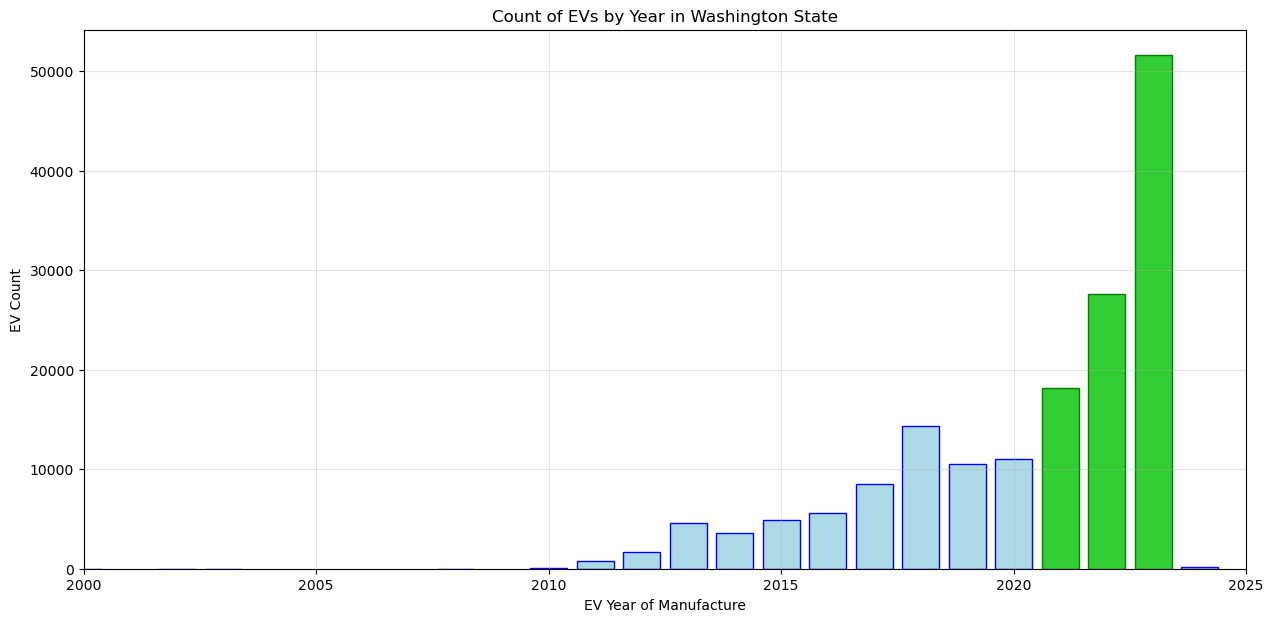

In [6]:

val_freq = ev_data['Year'].value_counts()  # Create dictionary (below) for y-axis values
cat_names = ev_data['Year'].unique()   # Create dictionary (below) for x-axis values

Year_count = {cat: ev_data['Year'].value_counts()[cat] for cat in cat_names}
#print(Make_count)
sorted_Year_count = {r: Year_count[r] for r in sorted(Year_count, key=Year_count.get, reverse=True)}
print(sorted_Year_count, '\n\n')


plt.rcParams["figure.figsize"] = (15,7)

# Get the top 3 Make keys and their counts
top_3_Year = list(sorted_Year_count.keys())[:3]
top_3_counts = [sorted_Year_count[year] for year in top_3_Year]

# Plot the filtered keys and values
plt.bar(sorted_Year_count.keys(), sorted_Year_count.values(), color='lightblue', edgecolor='b')

# Color the top 3 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i < 3 and bar.get_height() > 10:
        # bar.set_color('green')
        bar.set_facecolor('limegreen')
        bar.set_edgecolor('green')

plt.xlabel("EV Year of Manufacture")
plt.xlim(2000, 2025)
plt.ylabel("EV Count")
plt.title("Count of EVs by Year in Washington State")
plt.xticks()
plt.grid(True, alpha = 0.35)

plt.savefig("../Output_data/Fig1.png")
plt.show()


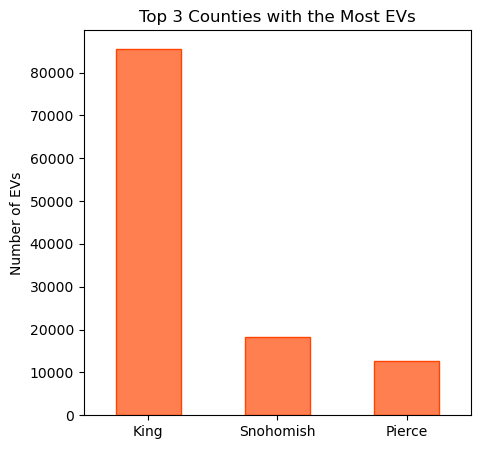

In [7]:
EV_Top_Counties = pop_ev_msrp["County"].value_counts()
EV_Top_3 = EV_Top_Counties.nlargest(3)
EV_Top_3.plot(kind="bar", figsize = (5, 5), facecolor = 'coral', edgecolor = 'orangered')
plt.ylabel('Number of EVs')
plt.xticks(rotation = 0, fontsize = 10)
plt.title("Top 3 Counties with the Most EVs")
plt.savefig("../Output_data/Fig2.png")
plt.show()

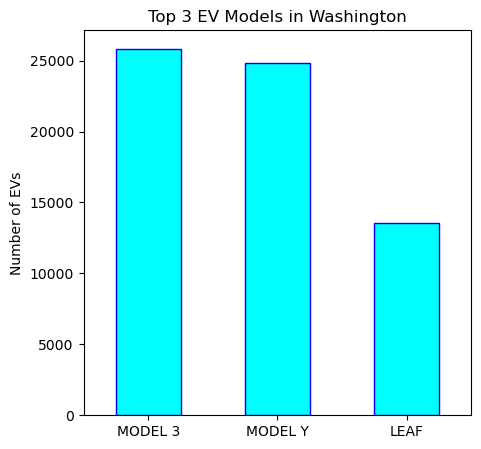

In [8]:
EV_Top_Counties = pop_ev_msrp["Model"].value_counts()
#print(EV_Top_Counties)
EV_Top_3 = EV_Top_Counties.nlargest(3)
EV_Top_3.plot(kind="bar", figsize = (5, 5), facecolor = 'cyan', edgecolor = 'b')
plt.ylabel('Number of EVs')
plt.xticks(rotation = 0, fontsize = 10)
plt.title("Top 3 EV Models in Washington")
plt.savefig("../Output_data/Fig3.png")
plt.show()

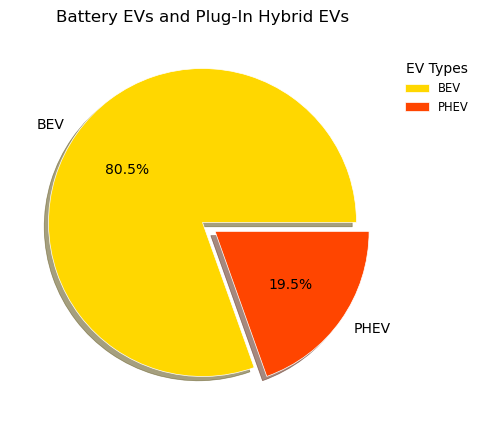

In [9]:

ev_type = pop_ev_msrp['Vehicle Type'].value_counts()

types = ['BEV', 'PHEV']

plt.rcParams["figure.figsize"] = (5, 5)
wedges, labels, autopct_text = plt.pie(ev_type.tolist(),
                                       labels=types,
                                       colors=['gold', 'orangered'],  # gold
                                       startangle=0, shadow=True, explode=(0, 0.1), autopct='%1.1f%%',
                                       wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

custom_legend = [f'{label}' for label, percent in zip(types, ev_type.tolist())]

plt.legend(wedges, custom_legend, title='EV Types', loc='center left', bbox_to_anchor=(1.0, 0.85), fontsize='small', edgecolor = 'white')

plt.title("Battery EVs and Plug-In Hybrid EVs")
plt.savefig("../Output_data/Fig4.png")
plt.show()

## Top 3 Popular EVs in Washington

{'TESLA': 63032, 'NISSAN': 15324, 'CHEVROLET': 11528, 'RIVIAN': 10146, 'BMW': 9197, 'FORD': 8486, 'VOLKSWAGEN': 8379, 'KIA': 8028, 'TOYOTA': 5149, 'VOLVO': 3322, 'AUDI': 3139, 'JEEP': 2938, 'HYUNDAI': 2636, 'CHRYSLER': 2381, 'PORSCHE': 1695, 'SUBARU': 986, 'MERCEDES-BENZ': 862, 'LUCID': 842, 'FIAT': 818, 'HONDA': 799, 'MITSUBISHI': 763, 'MINI': 758, 'POLESTAR': 727, 'SMART': 276, 'JAGUAR': 224, 'LINCOLN': 220, 'GENESIS': 137, 'CADILLAC': 126, 'LEXUS': 88, 'MAZDA': 53, 'LAND ROVER': 43, 'FISKER': 15, 'AZURE DYNAMICS': 8, 'TH!NK': 4, 'BENTLEY': 3, 'WHEEGO ELECTRIC CARS': 3} 




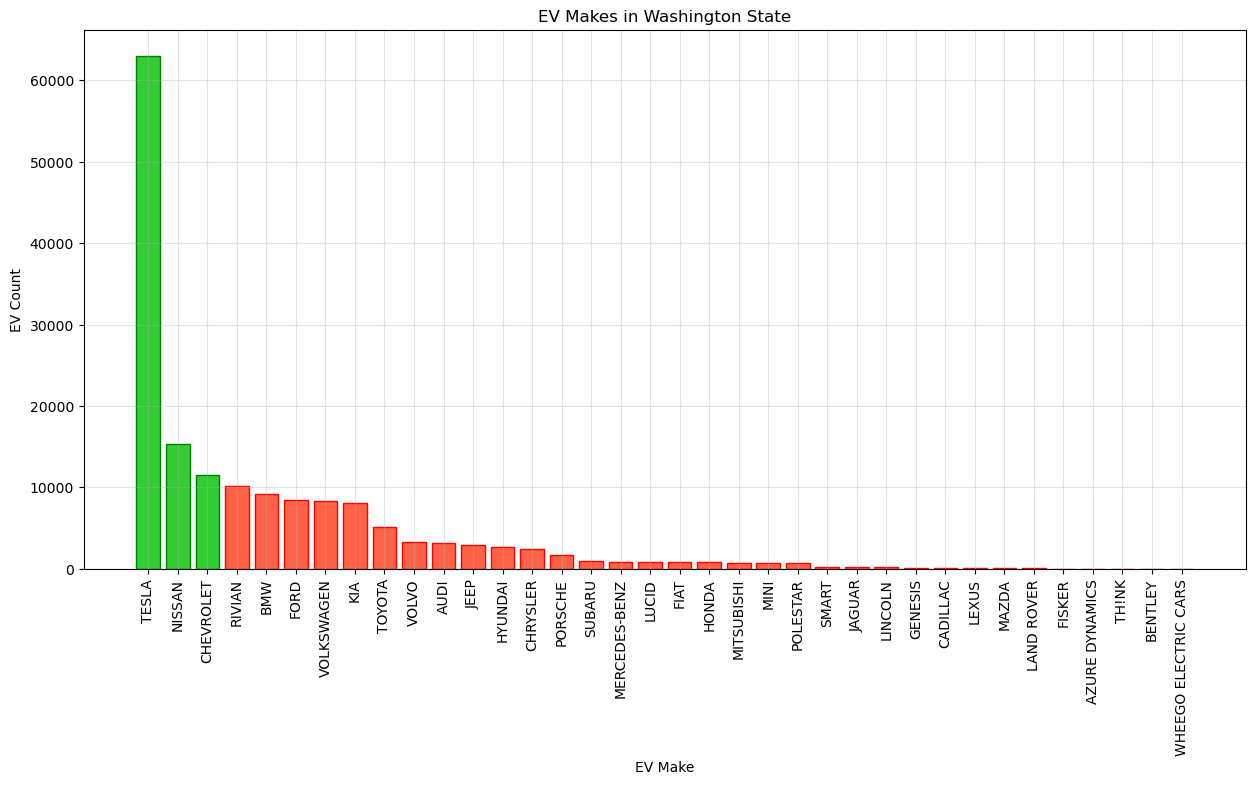

In [10]:

val_freq = ev_data['Make'].value_counts()  # Create dictionary (below) for y-axis values
cat_names = ev_data['Make'].unique()   # Create dictionary (below) for x-axis values

Make_count = {cat: ev_data['Make'].value_counts()[cat] for cat in cat_names}
#print(Make_count)
sorted_Make_count = {r: Make_count[r] for r in sorted(Make_count, key=Make_count.get, reverse=True)}
print(sorted_Make_count, '\n\n')


plt.rcParams["figure.figsize"] = (15,7)
# Filter the dictionary to keep only the entries with values greater than 10

# Get the top 3 Make keys and their counts
top_3_Make = list(sorted_Make_count.keys())[:3]
top_3_counts = [sorted_Make_count[make] for make in top_3_Make]

# Plot the filtered keys and values
plt.bar(sorted_Make_count.keys(), sorted_Make_count.values(), color='tomato', edgecolor='red')

# Color the top 3 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i < 3 and bar.get_height() > 10:
        # bar.set_color('green')
        bar.set_facecolor('limegreen')
        bar.set_edgecolor('green')

plt.xlabel("EV Make")
plt.ylabel("EV Count")
plt.title("EV Makes in Washington State")
plt.xticks(rotation=90)
plt.grid(True, alpha = 0.35)
plt.savefig("../Output_data/Fig5.png")
plt.show()

# https://www.geeksforgeeks.org/how-to-add-a-patch-in-a-plot-in-python/

## County Population vs. Number of EVs

{county:EV_Count}
 {'Kitsap': 5615, 'King': 85602, 'Thurston': 5772, 'Snohomish': 18189, 'Yakima': 892, 'Spokane': 3972, 'Grant': 490, 'Walla Walla': 361, 'Chelan': 1122, 'Okanogan': 251, 'Island': 1748, 'Kittitas': 579, 'Skagit': 1889, 'Douglas': 318, 'Whitman': 273, 'Stevens': 208, 'Clark': 9571, 'Cowlitz': 831, 'Pierce': 12758, 'Whatcom': 4235, 'Benton': 1990, 'Jefferson': 954, 'Clallam': 1102, 'Lewis': 636, 'Wahkiakum': 49, 'San Juan': 979, 'Grays Harbor': 558, 'Skamania': 186, 'Franklin': 500, 'Pacific': 174, 'Mason': 727, 'Pend Oreille': 62, 'Adams': 45, 'Asotin': 74, 'Klickitat': 337, 'Lincoln': 36, 'Columbia': 17, 'Ferry': 29, 'Garfield': 4} 


{county: population}
 {'Kitsap': 666100, 'King': 6794340, 'Thurston': 766220, 'Snohomish': 2204965, 'Yakima': 694445, 'Spokane': 1500410, 'Grant': 263240, 'Walla Walla': 171960, 'Chelan': 210625, 'Okanogan': 102500, 'Island': 204240, 'Kittitas': 120720, 'Skagit': 342935, 'Douglas': 108610, 'Whitman': 138370, 'Stevens': 104645, 'Clark': 1

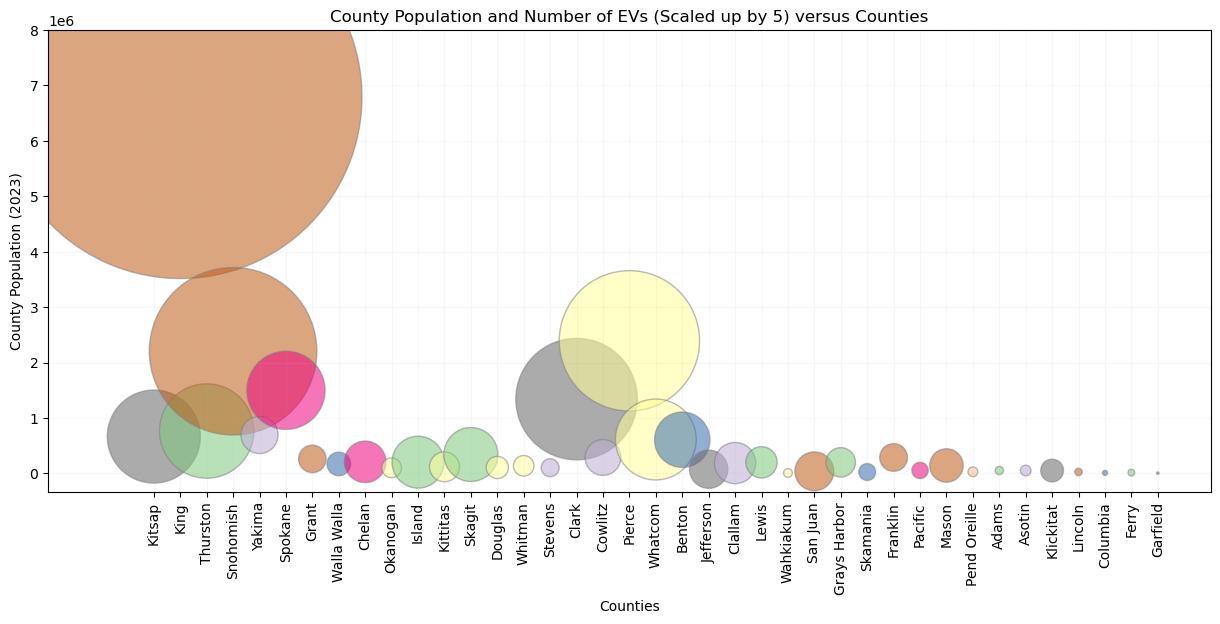

In [11]:
# Bubble Plot
# Population in each county
county_pop = pop_ev_msrp.groupby('County')['POP_2023']     # Create dictionary (below) for y-axis values

# Number of EVs in each county
val_count = pop_ev_msrp['County'].value_counts()    # Create dictionary (below) using value_counts()

# Name of each county
uniq_names = pop_ev_msrp['County'].unique()

county_count = {uniq: pop_ev_msrp['County'].value_counts()[uniq] for uniq in uniq_names}  # Dictionary {county:num_EVs}
print('{county:EV_Count}\n', county_count, '\n\n')
county_count_vals = [county_count[uniq] for uniq in county_count.keys()] # List of number of EVs in each county

name_pop = {county: county_pop.get_group(county).values[0] for county in county_count.keys()}  # Dictionary {county: population}
print('{county: population}\n', name_pop, '\n\n')

# Plot 1

#size of bubble is the number of EVs
scaled_county_count_vals = np.multiply(county_count_vals, 0.8)  # Scaled up by 5

colors = np.random.rand(len(uniq_names))
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter(name_pop.keys(), name_pop.values(), s = scaled_county_count_vals, c = colors, cmap = 'Accent', edgecolors = 'gray', alpha = 0.55)

plt.grid(True, alpha = 0.1)
plt.xlabel("Counties")
plt.xlim(-4, len(name_pop.keys()) + 1)
plt.ylabel("County Population (2023)")
plt.ylim(ymax = 8e6)

plt.title("County Population and Number of EVs (Scaled up by 5) versus Counties")
plt.xticks(rotation=90)
plt.savefig("../Output_data/Fig6.png")
plt.show()



## EVs Per Capita in a County

{County: EV_Population %}
 {'Kitsap': 0.84, 'King': 1.26, 'Thurston': 0.75, 'Snohomish': 0.82, 'Yakima': 0.13, 'Spokane': 0.26, 'Grant': 0.19, 'Walla Walla': 0.21, 'Chelan': 0.53, 'Okanogan': 0.24, 'Island': 0.86, 'Kittitas': 0.48, 'Skagit': 0.55, 'Douglas': 0.29, 'Whitman': 0.2, 'Stevens': 0.2, 'Clark': 0.71, 'Cowlitz': 0.29, 'Pierce': 0.53, 'Whatcom': 0.69, 'Benton': 0.33, 'Jefferson': 1.24, 'Clallam': 0.59, 'Lewis': 0.32, 'Wahkiakum': 0.51, 'San Juan': 2.48, 'Grays Harbor': 0.28, 'Skamania': 0.7, 'Franklin': 0.17, 'Pacific': 0.31, 'Mason': 0.5, 'Pend Oreille': 0.2, 'Adams': 0.08, 'Asotin': 0.14, 'Klickitat': 0.63, 'Lincoln': 0.13, 'Columbia': 0.16, 'Ferry': 0.19, 'Garfield': 0.07} 




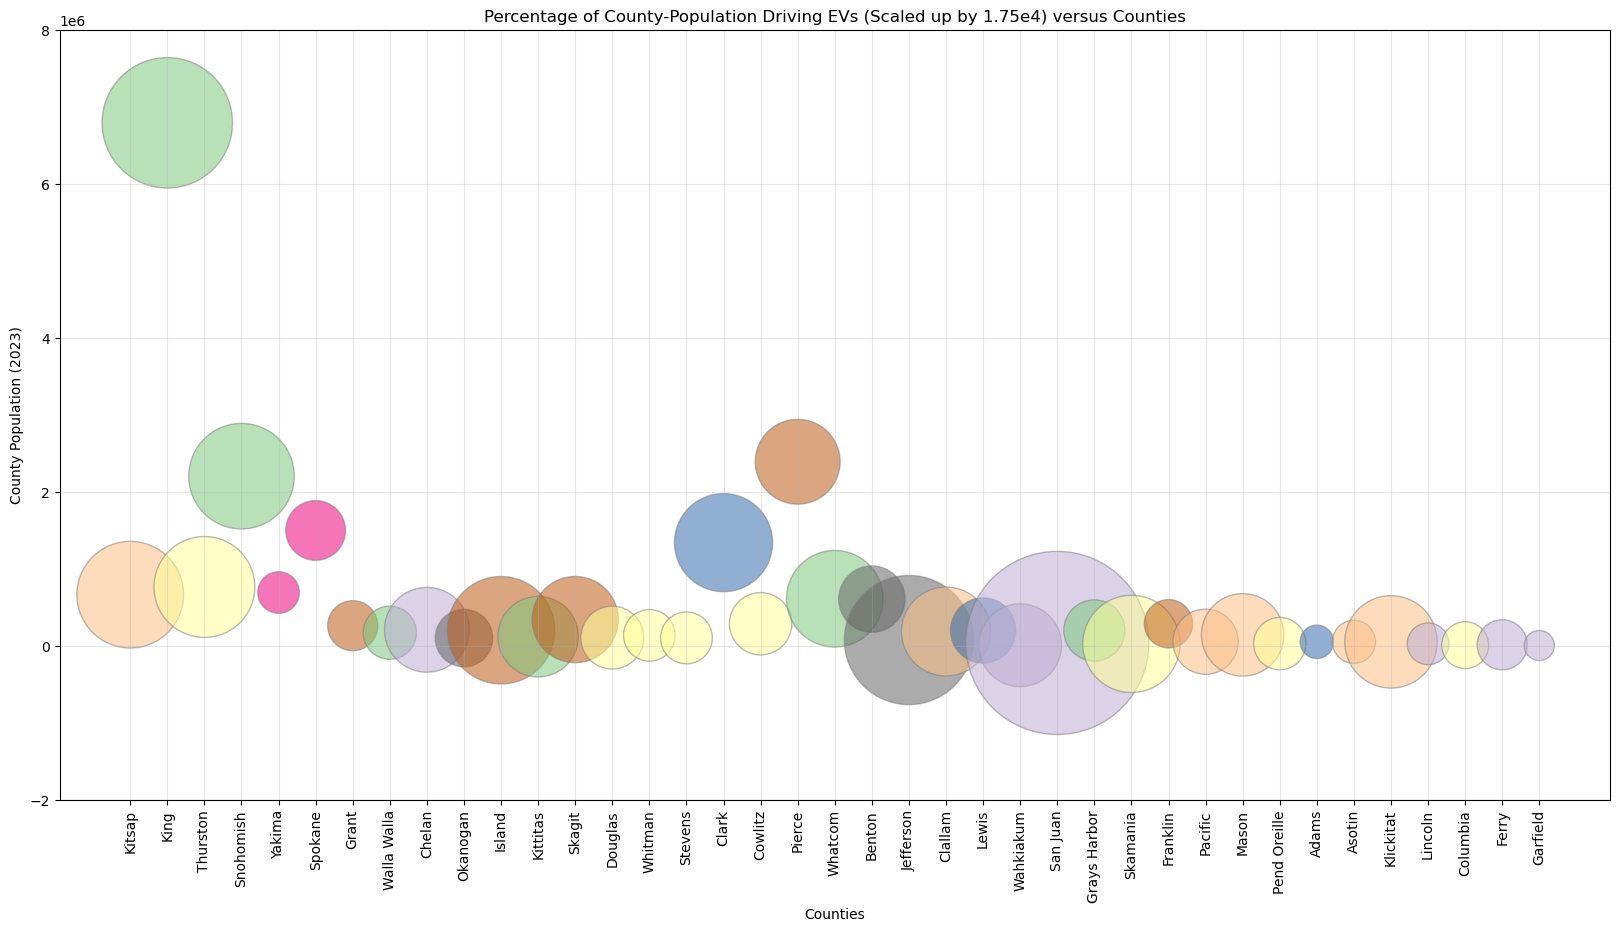

In [12]:
# Plot 2

# {County name: County population} dictionary
name_pop = {county: county_pop.get_group(county).values[0] for county in county_count.keys()}

# List of ratio = (EV Count)/(County population)
ev_pop_ratio = [county_count_vals[i] / name_pop[list(county_count.keys())[i]] for i in range(len(county_count_vals))]
ev_pop_ratio_percentage = [round(value*100, 2) for value in ev_pop_ratio]  # Ratio to %

# Bubble size
scaled_county_count_vals = np.multiply(ev_pop_ratio, 0.7e6)  # Scaled up by 1.75e4

ratio_dict = {county: ev_pop_ratio_percentage[i] for i, county in enumerate(county_count.keys())}  # Dictionary {county: population ratio}
print('{County: EV_Population %}\n', ratio_dict, '\n\n')

colors = np.random.rand(len(uniq_names))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(name_pop.keys(), name_pop.values(), s = scaled_county_count_vals, c = colors, cmap = 'Accent', edgecolors = 'gray', alpha = 0.55)

plt.grid(True, alpha = 0.3)
plt.xlabel("Counties")
plt.ylabel("County Population (2023)")
plt.ylim(ymin = -2e6, ymax = 8e6)

plt.title("Percentage of County-Population Driving EVs (Scaled up by 1.75e4) versus Counties")
plt.xticks(rotation=90)
plt.savefig("../Output_data/Fig7.png")
plt.show()



## Outliers and Box Plots of Numerical Features

In [18]:
# List of features
ev_features = ['Year', 'Electric Range', 'Base MSRP', 'POP_2023']

def outliers(feature):
    quartiles = pop_ev_msrp[feature].quantile([0.25, 0.5, 0.75])

    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    
    extreme_lower_bound = lowerq - (3.0 * iqr)
    extreme_upper_bound = upperq + (3.0 * iqr)

    # outliers 
    outliers = pop_ev_msrp[(pop_ev_msrp[feature] < lower_bound) | (pop_ev_msrp[feature] > upper_bound)][feature]
    extreme_outliers = pop_ev_msrp[(pop_ev_msrp[feature] < extreme_lower_bound) | (pop_ev_msrp[feature] > extreme_upper_bound)][feature]

    if extreme_outliers.empty:
        print(f"{feature}'s potential outliers:\nNone found\n")
    else:
        print(f"{feature}'s potential outliers:\n{extreme_outliers}\n")
        
#Calling function outliers    
for feature in ev_features:
    outliers(feature)  


Year's potential outliers:
9302      2002
9588      2000
12491     2000
14779     2000
25140     1999
56637     2000
59001     2000
60100     1998
67562     1999
78913     2000
90965     2000
108266    2000
116779    2002
136620    1999
136623    2000
145659    1999
155134    1997
Name: Year, dtype: int64

Electric Range's potential outliers:
1015      337
6067      337
9729      337
10498     337
10850     337
         ... 
154078    337
155435    337
156111    337
158363    337
162962    337
Name: Electric Range, Length: 76, dtype: int64

Base MSRP's potential outliers:
44         69900
75         69900
82         31950
90         69900
161        69900
           ...  
162882     64950
162889     69900
162918     52900
162986    110950
163116     31950
Name: Base MSRP, Length: 3404, dtype: int64

POP_2023's potential outliers:
None found



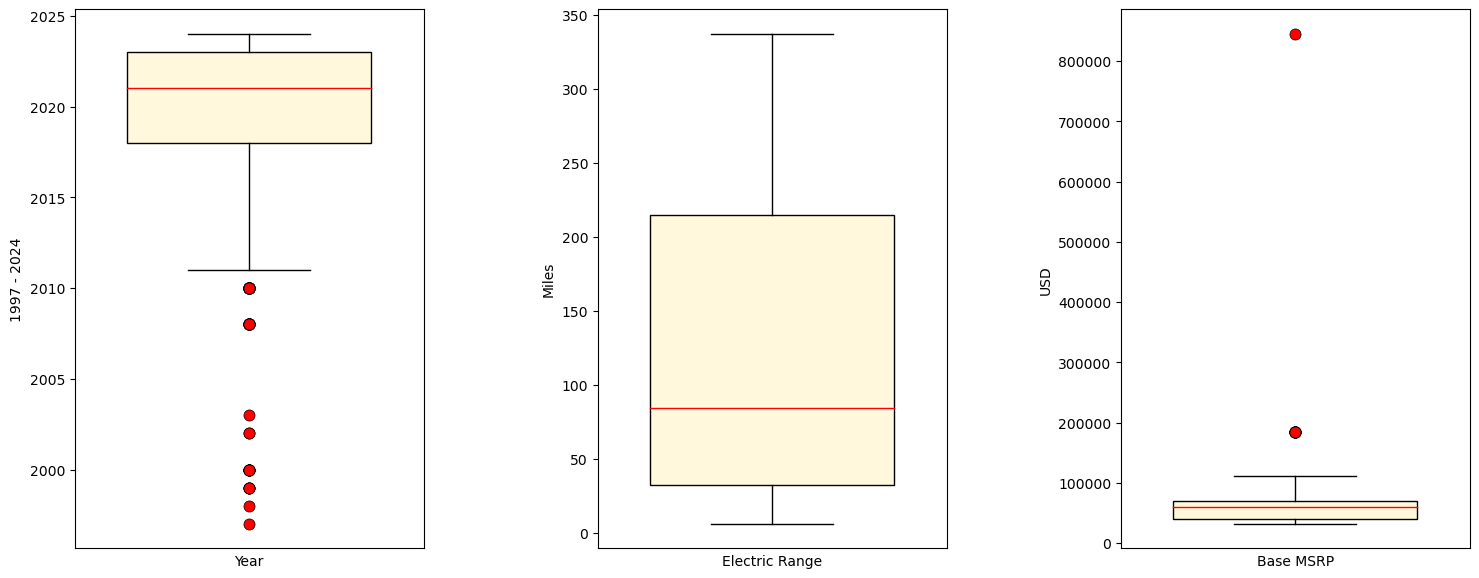

In [19]:

import numpy as np

ev_features = ['Year', 'Electric Range', 'Base MSRP']
ev_y = ['1997 - 2024', 'Miles', 'USD']

# Copy of pop_ev_msrp with select columns in ev_features
ev_numeric = pop_ev_msrp[ev_features].copy()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
fig.subplots_adjust(wspace=0.5)

box_props = dict(color='black', facecolor='cornsilk')
med_props = dict(color='red')
outlier_props = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='k',  markeredgewidth=0.5)

i = j = 0
for column in ev_numeric:
    
    if column == 'Base MSRP':
        ev_numeric_filtered = ev_numeric[ev_numeric['Base MSRP'] != 0]
        bp = axs[j].boxplot(ev_numeric_filtered['Base MSRP'], vert=True, widths=0.7, patch_artist=True, boxprops=box_props)
        
    elif column == 'Electric Range':
        ev_numeric_filtered = ev_numeric[ev_numeric['Electric Range'] != 0]
        bp = axs[j].boxplot(ev_numeric_filtered['Electric Range'], vert=True, widths=0.7, patch_artist=True, boxprops=box_props)
        
    else:
        bp = axs[j].boxplot(ev_numeric[column], vert=True, widths=0.7, patch_artist=True, boxprops=box_props)
     
    axs[j].set_xlabel(ev_features[j])
    axs[j].set_ylabel(ev_y[j])
    axs[j].set_xticks([])  # Removing tick mark that shows as '1'
    
    for median in bp['medians']:
        median.set(**med_props)
    for flier in bp['fliers']:
        flier.set(**outlier_props)

    j += 1
    if j > 2:
        i += 1; j = 0

plt.savefig("../Output_data/Fig8.png")        
plt.show()



In [20]:
# Top 2 Priciest EV
most_expensive_2 = pop_ev_msrp['Base MSRP'].nlargest(2)

top_2_ev_rows = pop_ev_msrp.loc[pop_ev_msrp['Base MSRP'].isin(most_expensive_2)].groupby('Base MSRP').head(1)
top_2_ev_rows

,State,County,City,Postal Code,Latitude,Longitude,Year,Make,Model,Vehicle Type,Electric Range,CAFV Eligibility,Year_Make_Model,Base MSRP,POP_2023,Model Name,Average MSRP
19767,WA,Clark,Vancouver,98662,45.661706,-122.591849,2018,PORSCHE,PANAMERA,PHEV,14,Not eligible,2018 porsche panamera,184400,1342045,NaN,NaN
57267,WA,King,Hunts Point,98004,47.613850,-122.201905,2015,PORSCHE,918,PHEV,12,Not eligible,2015 porsche 918,845000,6794340,NaN,NaN


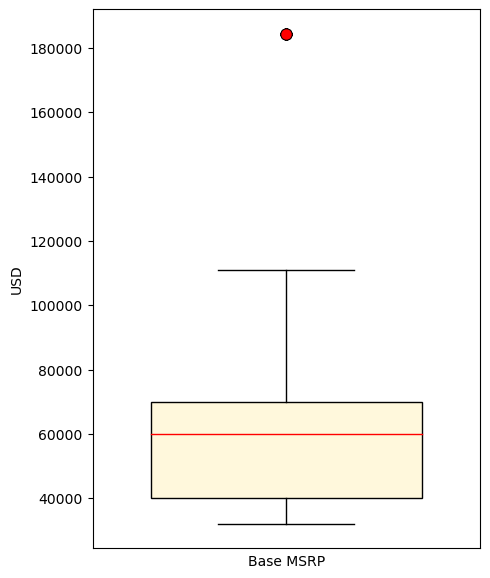

In [16]:

ev_features = ['Year', 'Electric Range', 'Base MSRP', 'POP_2023']
ev_numeric = pop_ev_msrp[ev_features].copy()

box_props = dict(color='black', facecolor='cornsilk')
med_props = dict(color='red')
outlier_props = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='k', markeredgewidth=0.5)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 7))

# Filtering out values greater than 0 and less than 200000 from 'Base MSRP'
ev_numeric_filtered = ev_numeric[(ev_numeric['Base MSRP'] > 0) & (ev_numeric['Base MSRP'] < 200000)]

# Plot the box plot for the filtered data
bp = plt.boxplot(ev_numeric_filtered['Base MSRP'], vert=True, widths=0.7, patch_artist=True, boxprops=box_props)
plt.xlabel('Base MSRP')
plt.ylabel('USD')
plt.xticks([])  # Removing tick mark that shows as '1'

for median in bp['medians']:
    median.set(**med_props)
for flier in bp['fliers']:
    flier.set(**outlier_props)

plt.savefig("../Output_data/Fig9.png")    
plt.show()

## Statistical Values for Numerical Features

In [4]:
# Summary Statistics with extreme outliers

ev_features = ['Year', 'Electric Range', 'Base MSRP', 'POP_2023']
ev_numeric = pop_ev_msrp[ev_features].copy()

summary_data = {}

for feature in ev_numeric:
    if feature == 'Base MSRP' or feature == 'Electric Range':
        
        summary_data[feature] = ev_numeric.loc[ev_numeric[feature] != 0, feature].agg(
            mean='mean',
            median='median',
            var='var',
            std='std'
        )
    else:
        # For other features, calculate statistics for all values
        summary_data[feature] = ev_numeric[feature].agg(
            mean='mean',
            median='median',
            var='var',
            std='std'
        )

summary_df = pd.DataFrame(summary_data)
columns = pd.MultiIndex.from_product([summary_df.columns, summary_df.index])

# Transpose the DataFrame to swap rows and columns, then set the new MultiIndex as the columns
summary_df = summary_df.T
summary_df

# https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html

,mean,median,var,std
Year,2.020261e+03,2021.0,9.044049e+00,3.007332e+00
Electric Range,1.276520e+02,84.0,9.808674e+03,9.903875e+01
Base MSRP,5.713017e+04,59900.0,5.201261e+08,2.280627e+04
POP_2023,4.207263e+06,6794340.0,7.729339e+12,2.780169e+06


In [21]:
# Summary Statistics WITHOUT extreme outliers

ev_features = ['Year', 'Electric Range', 'Base MSRP', 'POP_2023']
ev_numeric = pop_ev_msrp[ev_features].copy()

summary_data = {}

for feature in ev_numeric:
    if feature in ['Base MSRP', 'Electric Range']:
        
        filtered_data = ev_numeric[(ev_numeric[feature] > 0) & (ev_numeric[feature] < 200000)]
        summary_data[feature] = filtered_data[feature].agg(
            mean='mean',
            median='median',
            var='var',
            std='std'
        )
    
    else:
        
        summary_data[feature] = ev_numeric[feature].agg(
            mean='mean',
            median='median',
            var='var',
            std='std'
        )

summary_df = pd.DataFrame(summary_data)
columns = pd.MultiIndex.from_product([summary_df.columns, summary_df.index])

# Transpose set the new MultiIndex as the columns
summary_df = summary_df.T
summary_df

# https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html

,mean,median,var,std
Year,2.020261e+03,2021.0,9.044049e+00,3.007332e+00
Electric Range,1.276520e+02,84.0,9.808674e+03,9.903875e+01
Base MSRP,5.689864e+04,59900.0,3.377625e+08,1.837832e+04
POP_2023,4.207263e+06,6794340.0,7.729339e+12,2.780169e+06


## Histograms of 3 Numerical Features

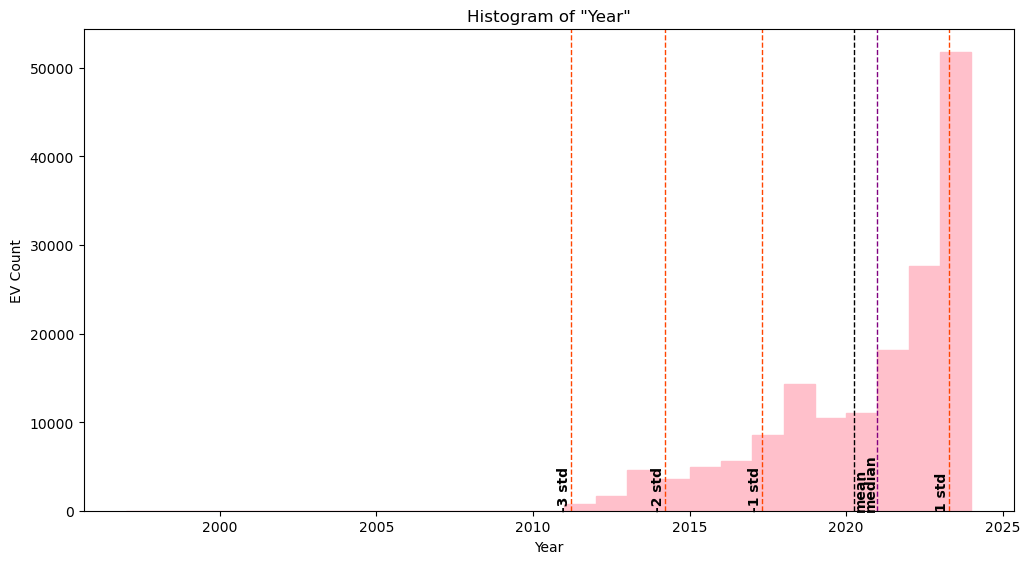

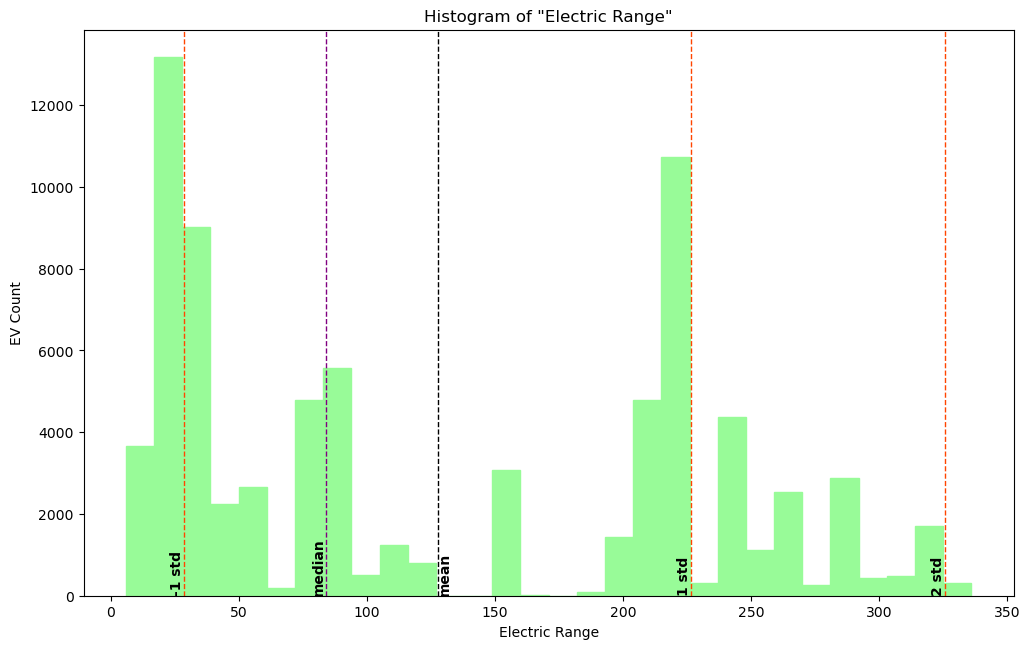

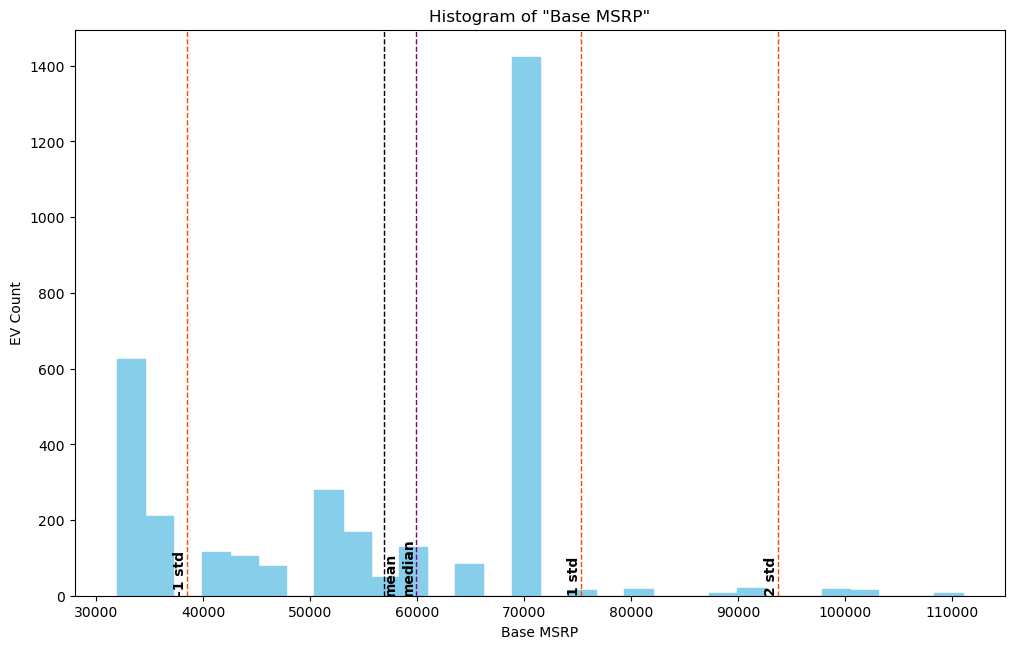

In [22]:

plt.rcParams["figure.figsize"] = (12, 25)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ev_features = ['Year', 'Electric Range', 'Base MSRP']

ev_numeric = pop_ev_msrp[ev_features].copy()

feature_colors = ['pink', 'palegreen', 'skyblue']

for idx, (feature, feature_color) in enumerate(zip(ev_features, feature_colors)):
    plt.subplot(3, 1, idx+1)
    
    if feature in ['Base MSRP', 'Electric Range']:
        ev_numeric = ev_numeric[(ev_numeric[feature] > 0) & (ev_numeric[feature] < 150000)]
        
    # Bin size for Histogram
    feature_max = ev_numeric[feature].max()
    feature_min = ev_numeric[feature].min()
    
    bin_size = max(int((feature_max - feature_min) / 30), 1)
    bins = [bin for bin in range(int(feature_min), int(feature_max) + 1, bin_size)]

    plt.hist(ev_numeric[feature], bins=bins, color=feature_color, edgecolor=feature_color)
    plt.xlabel(feature)
    plt.ylabel('EV Count')
    plt.title(f'Histogram of "{feature}"')
    
    # Get summary data for the current feature
    summary = summary_data[feature]
    mean = summary['mean']
    median = summary['median']
    std = summary['std']
    
    stat_param = {'mean': mean, 'median': median}
    
    for i in range(-4, 3):
        if (i + 1) == 0:
            continue
        else:
            stat_param.update({f'{i + 1} std': round(mean + (i + 1) * std, 1)})

    ln_color = ['black', 'purple', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered']

    for i, (k, v) in enumerate(stat_param.items()):
        if v <= feature_min:
            continue
        elif v > feature_max:
            continue
        else:
            plt.axvline(v, color=ln_color[i], linestyle='dashed', lw=1.00)
            if k == 'mean':
                plt.text(v, 2, k, color='k', ha='left', va='bottom', rotation=90, fontsize=10, weight='bold')
            else:
                plt.text(v, 2, k, color='k', ha='right', va='bottom', rotation=90, fontsize=10, weight='bold')

    plt.savefig("../Output_data/Fig10.png")
    plt.show()


## Scatter Plots with Regression Lines

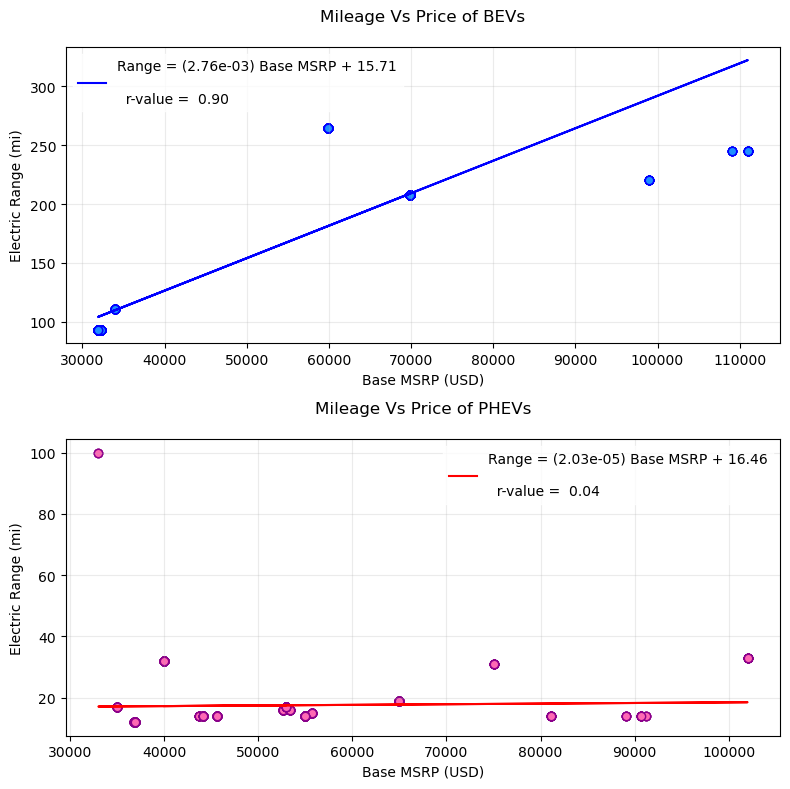

In [392]:
from scipy import stats

plt.rcParams["figure.figsize"] = (8, 8)

vehicle_types = ['BEV', 'PHEV']

for idx, v_type in enumerate(vehicle_types, 1):
    ev_numeric = pop_ev_msrp.loc[((pop_ev_msrp['Base MSRP'] > 0) & (pop_ev_msrp['Base MSRP'] < 180000)) & (pop_ev_msrp['Electric Range'] > 0) & (pop_ev_msrp['Vehicle Type'] == v_type)]

    # Subplot
    plt.subplot(2, 1, idx)
    #fig.subplots_adjust(hspace=0.75, wspace=0.3) 
    
    # Scatter plot
    plt.scatter(ev_numeric['Base MSRP'], ev_numeric['Electric Range'], color='dodgerblue' if v_type == 'BEV' else 'hotpink', edgecolor='b' if v_type == 'BEV' else 'darkmagenta')
    plt.xlabel('Base MSRP (USD)')
    plt.ylabel('Electric Range (mi)')
    plt.title(f'Mileage Vs Price of {v_type}s\n')
    
    # Correlation coefficient
    correlation_coefficient, p_value = stat.pearsonr(ev_numeric['Base MSRP'], ev_numeric['Electric Range'])
    r_label = f'r-value = {correlation_coefficient: .2f}'

    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(ev_numeric['Base MSRP'], ev_numeric['Electric Range'])
    regression_line = slope * ev_numeric['Base MSRP'] + intercept
    reg_line_label = f'Range = ({slope:.2e}) Base MSRP + {intercept:.2f}'

    # Regression line
    plt.plot(ev_numeric['Base MSRP'], regression_line, color='b' if v_type == 'BEV' else 'r', label= f'{reg_line_label}\n\n  {r_label}')
    
    plt.legend(edgecolor = 'white')
    plt.grid(True, alpha = 0.25)
    
plt.tight_layout()
plt.savefig("../Output_data/Fig11.png")
plt.show()

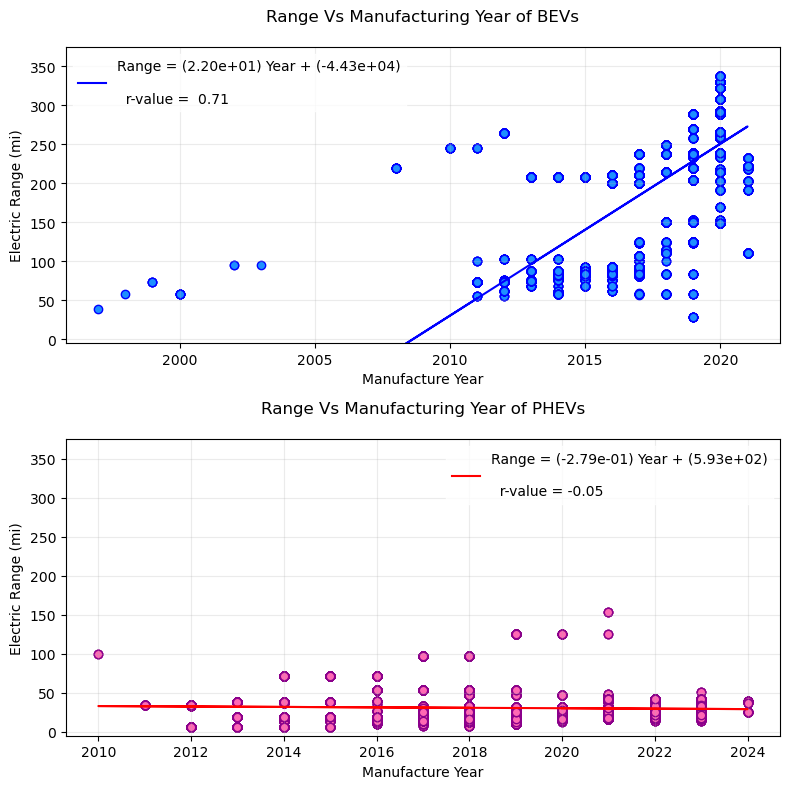

In [393]:
import scipy.stats as stat

plt.rcParams["figure.figsize"] = (8, 8)

vehicle_types = ['BEV', 'PHEV']

for idx, v_type in enumerate(vehicle_types, 1):
    ev_numeric = pop_ev_msrp.loc[(pop_ev_msrp['Electric Range'] > 0) & (pop_ev_msrp['Vehicle Type'] == v_type)]

    # Subplot
    plt.subplot(2, 1, idx)
    #fig.subplots_adjust(hspace=0.75, wspace=0.3)
   
    # Scatter plot
    plt.scatter(ev_numeric['Year'], ev_numeric['Electric Range'], color='dodgerblue' if v_type == 'BEV' else 'hotpink', edgecolor='b' if v_type == 'BEV' else 'darkmagenta')
    plt.xlabel('Manufacture Year')
    plt.ylabel('Electric Range (mi)')
    plt.ylim(-5, 375)
    plt.title(f'Range Vs Manufacturing Year of {v_type}s\n')
    
    # Correlation coefficient
    correlation_coefficient, p_value = stat.pearsonr(ev_numeric['Year'], ev_numeric['Electric Range'])
    r_label = f'r-value = {correlation_coefficient: .2f}'

    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(ev_numeric['Year'], ev_numeric['Electric Range'])
    regression_line = slope * ev_numeric['Year'] + intercept
    reg_line_label = f'Range = ({slope:.2e}) Year + ({intercept:.2e})'

    # Plot the regression line
    plt.plot(ev_numeric['Year'], regression_line, color='b' if v_type == 'BEV' else 'r', label= f'{reg_line_label}\n\n  {r_label}')
    
    plt.legend(edgecolor = 'white')
    plt.grid(True, alpha = 0.25)

plt.tight_layout()
plt.savefig("../Output_data/Fig12.png")
plt.show()


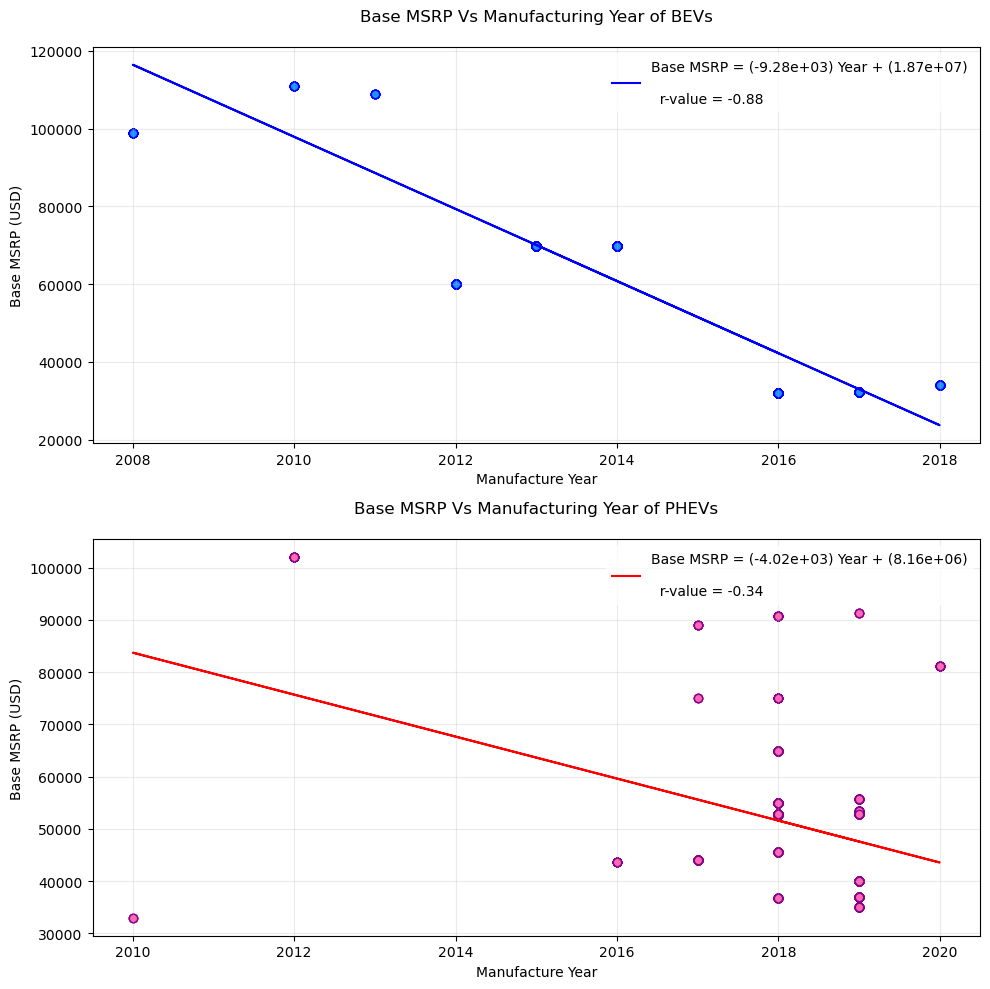

In [394]:
import scipy.stats as stat

plt.rcParams["figure.figsize"] = (10, 10)

vehicle_types = ['BEV', 'PHEV']

for idx, v_type in enumerate(vehicle_types, 1):
    ev_numeric = pop_ev_msrp.loc[((pop_ev_msrp['Base MSRP'] > 0) & (pop_ev_msrp['Base MSRP'] < 180000)) & (pop_ev_msrp['Vehicle Type'] == v_type)]

    # Subplot
    plt.subplot(2, 1, idx)
    #fig.subplots_adjust(hspace=0.75, wspace=0.3)
   
    # Scatter plot
    plt.scatter(ev_numeric['Year'], ev_numeric['Base MSRP'], color='dodgerblue' if v_type == 'BEV' else 'hotpink', edgecolor='b' if v_type == 'BEV' else 'darkmagenta')
    plt.xlabel('Manufacture Year')
    plt.ylabel('Base MSRP (USD)')
    #plt.ylim(-5, 375)
    plt.title(f'Base MSRP Vs Manufacturing Year of {v_type}s\n')
    
    # Correlation coefficient
    correlation_coefficient, p_value = stat.pearsonr(ev_numeric['Year'], ev_numeric['Base MSRP'])
    r_label = f'r-value = {correlation_coefficient: .2f}'

    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(ev_numeric['Year'], ev_numeric['Base MSRP'])
    regression_line = slope * ev_numeric['Year'] + intercept
    reg_line_label = f'Base MSRP = ({slope:.2e}) Year + ({intercept:.2e})'

    # Plot the regression line
    plt.plot(ev_numeric['Year'], regression_line, color='b' if v_type == 'BEV' else 'r', label= f'{reg_line_label}\n\n  {r_label}')
    
    plt.legend(edgecolor = 'white')
    plt.grid(True, alpha = 0.25)

plt.tight_layout()
plt.savefig("../Output_data/Fig13.png")
plt.show()

## Pie Chart: CAFV Eligibility

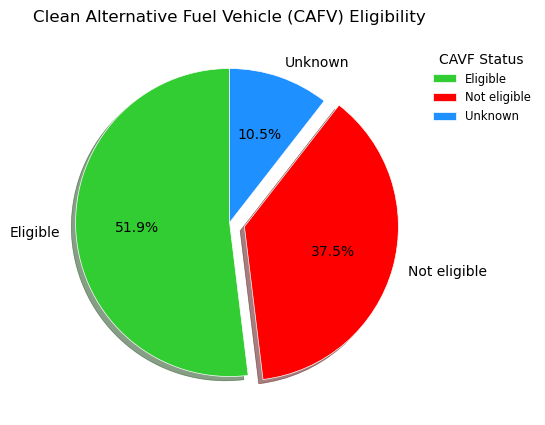

In [395]:

CAVF = pop_ev_msrp['CAFV Eligibility'].value_counts()

status = ['Eligible', 'Not eligible', 'Unknown']

plt.rcParams["figure.figsize"] = (5, 5)
wedges, labels, autopct_text = plt.pie(CAVF.tolist(),
                                       labels=status,
                                       colors=['limegreen', 'r', 'dodgerblue'],  # gold
                                       startangle=90, shadow=True, explode=(0, 0.1, 0), autopct='%1.1f%%',
                                       wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

custom_legend = [f'{label}' for label, percent in zip(status, CAVF.tolist())]

plt.legend(wedges, custom_legend, title='CAVF Status', loc='center left', bbox_to_anchor=(1.0, 0.85), fontsize='small', edgecolor = 'white')

plt.title("Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.savefig("../Output_data/Fig14.png")
plt.show()

## Bar Plot for EV Categories and CAFV Eligibility

Classification:
BEV     131246
PHEV     31889
Name: Vehicle Type, dtype: int64 


Percentage of each catagory:
BEV     80.5
PHEV    19.5
Name: Vehicle Type, dtype: object %

CAFV Eligibility  Eligible  Not eligible  Unknown
Vehicle Type                                     
BEV                46525.0          10.0  84711.0
PHEV               14722.0       17167.0      NaN 



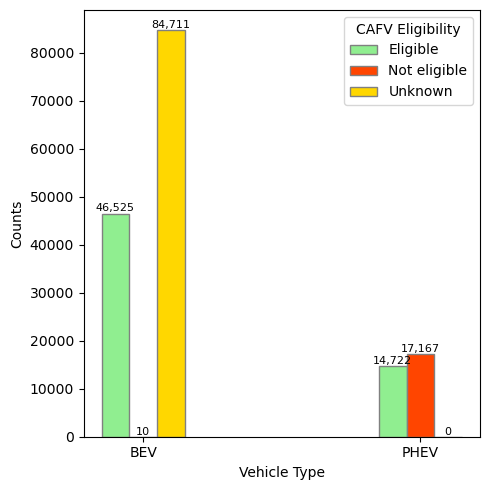

In [396]:
import numpy as np

pop_ev_msrp['Vehicle Type'] = pop_ev_msrp['Vehicle Type'].astype('object')
print('Classification:')
print(pop_ev_msrp['Vehicle Type'].value_counts(), '\n')

print('\nPercentage of each catagory:')
print(pop_ev_msrp['Vehicle Type'].value_counts(normalize=True).mul(100).round(1).astype(str), '%\n')

eligibility_ev_type = pop_ev_msrp.groupby(['Vehicle Type', 'CAFV Eligibility']).size().unstack()
print(eligibility_ev_type, '\n')

eligibility_ev_type.fillna(0, inplace=True)

# categories and the number of bars
categories = eligibility_ev_type.index
num_bars = len(categories)  # 3

bar_width = 0.1
bar_positions = np.arange(num_bars)

colors = ['lightgreen', 'orangered', 'gold']

fig, ax = plt.subplots()

# Plot each group of bars side by side
for i, eligibility in enumerate(eligibility_ev_type.columns):
    ax.bar(bar_positions + (i * bar_width), eligibility_ev_type[eligibility], width=bar_width, label=eligibility, color=colors[i], edgecolor='gray')

    # Display numbers on top of each bar
    for idx, val in enumerate(eligibility_ev_type[eligibility]):
        ax.text(bar_positions[idx] + (i * bar_width), val + 5, f'{int(val):,}', ha='center', va='bottom', fontsize=8, rotation=0, color='black')

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(categories)

ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Counts')
ax.legend(title='CAFV Eligibility', loc='upper right')

plt.tight_layout()
plt.savefig("../Output_data/Fig15.png")
plt.show()
